In [1]:
# if required
import findspark
findspark.init()
findspark.find()
from pyspark import SparkConf

# all imports
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


no. of rows: 29362
Top offenses are given below
+--------------------+-----+
|             Offense|count|
+--------------------+-----+
|      Assault Simple| 2526|
|         Hit and Run| 2277|
|       Towed Vehicle| 2116|
|           Vandalism| 1799|
| Larceny - All Other| 1786|
|Assist Citizen - ...| 1708|
| Suspicious Activity| 1594|
|Drug/Narcotics Vi...| 1262|
|  Lost/FoundProperty| 1152|
|Larceny - From Mo...| 1102|
+--------------------+-----+
only showing top 10 rows



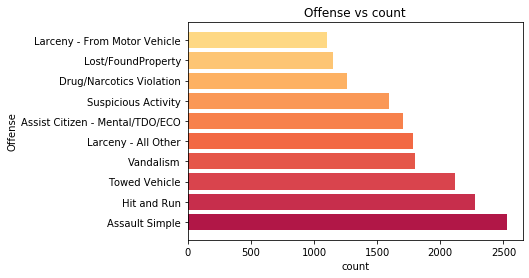

Offenses per hour
+----+-----+
|Hour|count|
+----+-----+
|  14| 1853|
|  16| 1719|
|  11| 1717|
|  13| 1715|
|  15| 1688|
|  10| 1685|
|  12| 1661|
|  17| 1485|
|   9| 1463|
|  23| 1413|
|  18| 1410|
|  22| 1291|
|  19| 1255|
|  20| 1221|
|  21| 1144|
|   8| 1088|
|   0| 1015|
|   1|  818|
|   2|  743|
|   4|  649|
|   7|  647|
|   3|  630|
|   5|  562|
|   6|  490|
+----+-----+

Offense happens most at Hour:
+----+-----+
|Hour|count|
+----+-----+
|  14| 1853|
+----+-----+
only showing top 1 row



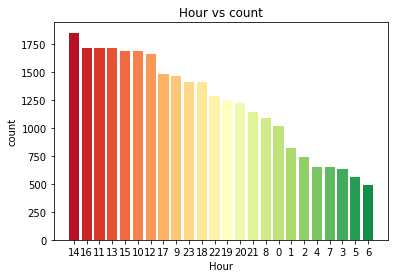

Offenses per street
+------------------+-----+
|        StreetName|count|
+------------------+-----+
|       E MARKET ST| 1773|
|         W MAIN ST| 1281|
|        EMMET ST N| 1145|
|         E MAIN ST|  670|
|JEFFERSON PARK AVE|  580|
|      PROSPECT AVE|  555|
|         5TH ST SW|  553|
|       PRESTON AVE|  542|
|        CHERRY AVE|  519|
|    UNIVERSITY AVE|  500|
|          RIDGE ST|  457|
|        14TH ST NW|  432|
|          1ST ST S|  424|
|        GARRETT ST|  419|
|       CARLTON AVE|  393|
|          HARDY DR|  346|
|           PARK ST|  327|
|       WERTLAND ST|  324|
|        E WATER ST|  301|
|         6TH ST SE|  292|
+------------------+-----+
only showing top 20 rows

Offense happens most in Street:
+-----------+-----+
| StreetName|count|
+-----------+-----+
|E MARKET ST| 1773|
+-----------+-----+
only showing top 1 row



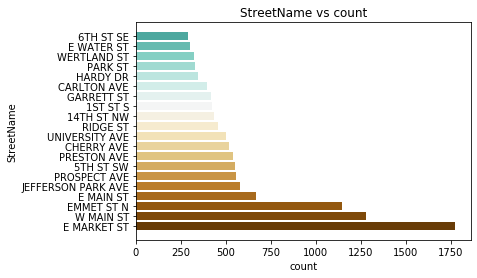

Offenses per Day
+---+-----+
|Day|count|
+---+-----+
|  6| 4536|
|  2| 4426|
|  3| 4323|
|  5| 4267|
|  4| 4227|
|  7| 4079|
|  1| 3504|
+---+-----+

Offense happens most on Day:
+---+-----+
|Day|count|
+---+-----+
|  6| 4536|
+---+-----+
only showing top 1 row



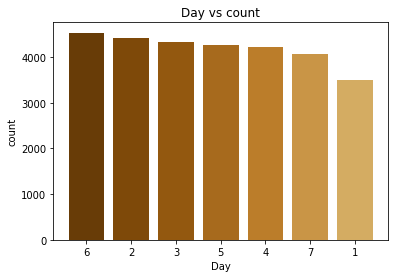

Offenses per Month
+-----+-----+
|Month|count|
+-----+-----+
|   10| 2733|
|    5| 2582|
|    9| 2564|
|    4| 2556|
|    8| 2531|
|    3| 2502|
|   11| 2460|
|    6| 2399|
|    7| 2389|
|   12| 2285|
|    1| 2275|
|    2| 2086|
+-----+-----+

Offense happens most in Month:
+-----+-----+
|Month|count|
+-----+-----+
|   10| 2733|
+-----+-----+
only showing top 1 row



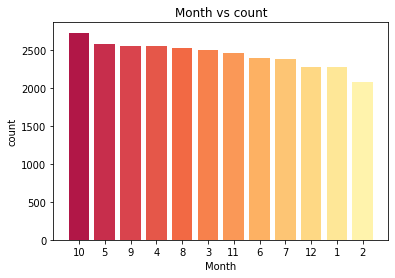

Month that has most offenses in a year
+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2015|    9|  600|
|2016|   10|  638|
|2017|   10|  598|
|2018|    5|  471|
+----+-----+-----+

Hour that has most offenses during a Day in the week
+---+----+-----+
|Day|Hour|count|
+---+----+-----+
|  1|  16|  210|
|  2|  13|  322|
|  3|  14|  317|
|  4|  14|  313|
|  5|  14|  284|
|  6|  13|  283|
|  7|  23|  207|
+---+----+-----+

Top offense every hour
+----+-------------------+-----+
|Hour|            Offense|count|
+----+-------------------+-----+
|   0|     Assault Simple|  135|
|   1|     Assault Simple|  124|
|   2|     Assault Simple|  106|
|   3|     Assault Simple|   81|
|   4|     Assault Simple|  103|
|   5|     Assault Simple|   91|
|   6|      Towed Vehicle|   58|
|   7|      Towed Vehicle|  105|
|   8|      Towed Vehicle|  182|
|   9|      Towed Vehicle|  190|
|  10|      Towed Vehicle|  194|
|  11|      Towed Vehicle|  221|
|  12|        Hit and Run|  147|
|  13|        Hi

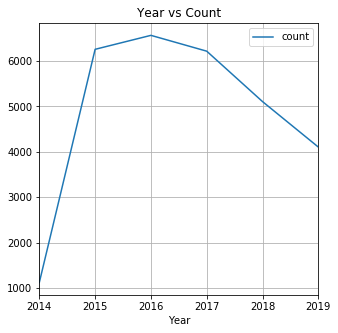

In [2]:
# Initial analysis of data

# load data from csv
def load_data(filename):
    return spark.read.csv('Crime_Data.csv', inferSchema=True, header=True)

# Total of Offenses over the years
def top_offenses(df, num):
    offense = df.groupBy('Offense').count().orderBy('count',ascending=False)
    offense.show(num)
    # offense_pd = offense.limit(num).toPandas()
    bar_plot(offense.limit(num).toPandas(), "Offense", "count", "Spectral")

def year_offenses(df):
    df2 = df.withColumn('Year',date_format(df.DateReported,'yyyy'))
    year = df2.groupBy('Year').count().orderBy('Year')
    year.show()
    plot(year.toPandas(),'Year','count','Year vs Count')

def hour_offenses(df):
    hour1 = df.withColumn('Hour', hour(df['DateReported']))
    hour2 = hour1.groupBy('Hour').count().orderBy('count',ascending=False)
    hour2.show(24)
    print("Offense happens most at Hour:")
    hour2.show(1)
    bar_plot_v(hour2.toPandas(), "Hour", "count", "RdYlGn")

def street_offenses(df, num):
    street = df.groupBy('StreetName').count().orderBy('count',ascending=False)
    street.show(num)
    print("Offense happens most in Street:")
    street.show(1)
    bar_plot(street.limit(num).toPandas(), "StreetName", "count", "BrBG")

def days_of_week(df):
    days = df.withColumn('Day', dayofweek(df['DateReported']))
    days2 = days.groupBy('Day').count().orderBy('count',ascending=False)
    days2.show(7)
    print("Offense happens most on Day:")
    days2.show(1)
    bar_plot_v(days2.toPandas(), "Day", "count", "BrBG")

def month_of_year(df):
    months = df.withColumn('Month', month(df['DateReported']))
    months2 = months.groupBy('Month').count().orderBy('count',ascending=False)
    months2.show(12)
    print("Offense happens most in Month:")
    months2.show(1)
    bar_plot_v(months2.toPandas(), "Month", "count", "Spectral")   

def top_month_in_year(df):
    df2 = df.withColumn('Year',date_format(df.DateReported,'yyyy')).withColumn('Month',month(df['DateReported']))
    years = df2.groupBy('Year','Month').count()
    years.createOrReplaceTempView("YEAR_TABLE")
    years = spark.sql("SELECT * FROM YEAR_TABLE WHERE YEAR IN (SELECT YEAR FROM YEAR_TABLE GROUP BY YEAR HAVING COUNT(YEAR)=12)")
    years.createOrReplaceTempView("YEAR_TABLE")
    years2 = spark.sql("SELECT Y.* FROM YEAR_TABLE Y INNER JOIN (SELECT YEAR, MAX(COUNT) AS COUNT FROM YEAR_TABLE GROUP BY YEAR) T ON Y.YEAR = T.YEAR AND Y.COUNT = T.COUNT ORDER BY Y.YEAR")
    years2.show()

def top_hour_in_day(df):
    df2 = df.withColumn('Day', dayofweek(df['DateReported'])).withColumn('Hour', hour(df['DateReported']))
    days = df2.groupBy('Day','Hour').count()
    days.createOrReplaceTempView("DAY_TABLE")
    days2 = spark.sql("SELECT D.* FROM DAY_TABLE D INNER JOIN (SELECT DAY, MAX(COUNT) AS COUNT FROM DAY_TABLE GROUP BY DAY) T ON D.DAY = T.DAY AND D.COUNT = T.COUNT ORDER BY D.DAY")
    days2.show()

def top_offense_every_hour(df):
    df2 = df.withColumn('Hour', hour(df['DateReported']))
    offense = df2.groupBy('Hour','Offense').count()
    offense.createOrReplaceTempView("OFF_TABLE")
    offense2 = spark.sql("SELECT O.* FROM OFF_TABLE O INNER JOIN (SELECT HOUR, MAX(COUNT) AS COUNT FROM OFF_TABLE GROUP BY HOUR) T ON O.HOUR = T.HOUR AND O.COUNT = T.COUNT ORDER BY O.HOUR")
    offense2.show(offense2.count())

def plot(df, x_col, y_col, title):
    ax = df.plot(kind='line',x=x_col,y=y_col,figsize=(5,5),title=title,grid=True)

def bar_plot(df, x_col, y_col, color):
    df_pos = [i for i, _ in enumerate(df[x_col])]
    plt.barh(df_pos, df[y_col], color=sns.color_palette(color, 25))
    plt.ylabel(x_col)
    plt.xlabel(y_col)
    plt.title(x_col+" vs "+y_col)
    plt.yticks(df_pos, df[x_col])
    plt.show()

def bar_plot_v(df, x_col, y_col, color):
    df_pos = [i for i, _ in enumerate(df[x_col])]
    plt.bar(df_pos, df[y_col], color=sns.color_palette(color, 25))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(x_col+" vs "+y_col)
    plt.xticks(df_pos, df[x_col])
    plt.show()

# main
if __name__ == '__main__':
    # set context
    conf = SparkConf().setAppName('Crime Data').setMaster('local')
    spark = SparkSession.builder.config(conf=conf).getOrCreate()
    
    # load data
    crime_df = load_data('Crime_Data.csv')
    print("no. of rows:", crime_df.count())
    
    # top offenses
    print("Top offenses are given below")
    top_offenses(crime_df, 10)
    
    # offenses per hour
    print("Offenses per hour")
    hour_offenses(crime_df)
    
    # offenses per street
    print("Offenses per street")
    street_offenses(crime_df, 20)
    
    # Days of week
    print("Offenses per Day")
    days_of_week(crime_df)
    
    # Month of Year
    print("Offenses per Month")
    month_of_year(crime_df)
    
    # Top Month in Year
    print("Month that has most offenses in a year")
    top_month_in_year(crime_df)
    
    # Top Hour in a Day
    print("Hour that has most offenses during a Day in the week")
    top_hour_in_day(crime_df)
    
    # Top Offense every Hour
    print("Top offense every hour")
    top_offense_every_hour(crime_df)
    
    # offenses per year
    print("Offenses per year")
    year_offenses(crime_df)


Crime dataset
+--------+--------------------+------------+-----------+--------------+------+-------------------+------------+--------+----+----+----+
|RecordID|             Offense|  IncidentID|BlockNumber|    StreetName|Agency|       DateReported|HourReported|Holidays|TMAX|TMIN|SNOW|
+--------+--------------------+------------+-----------+--------------+------+-------------------+------------+--------+----+----+----+
|       1|      Assault Simple|201900031384|      100.0| ELLIEWOOD AVE|   CPD|2019-10-26 22:47:59|        2247|       0|69.0|  51| 0.0|
|       2|Drug/Narcotics Vi...|201900031350|      400.0|   E MARKET ST|   CPD|2019-10-26 16:55:25|        1655|       0|69.0|  51| 0.0|
|       3| Larceny - All Other|201900031344|      600.0|  MONTROSE AVE|   CPD|2019-10-26 16:22:06|        1622|       0|69.0|  51| 0.0|
|       4| Motor Vehicle Theft|201900031326|      200.0|    14TH ST NW|   CPD|2019-10-26 12:43:43|        1243|       0|69.0|  51| 0.0|
|       5|Larceny - From Mo...|201

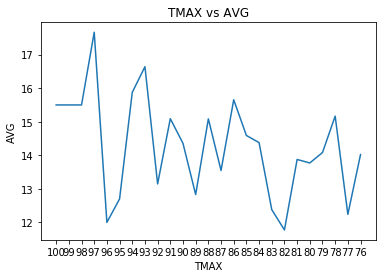

TMIN vs Offense count table
+----+------------------+
|TMIN|               AVG|
+----+------------------+
|  77|15.333333333333334|
|  76|              11.2|
|  75|              14.8|
|  74|              14.0|
|  73|15.333333333333334|
|  72|          14.65625|
|  71|15.341463414634147|
|  70|14.407407407407407|
|  69|12.912280701754385|
|  68|14.317460317460318|
|  67|13.902777777777779|
|  66|14.158730158730158|
|  65|13.535211267605634|
|  64|14.457627118644067|
|  63|12.016666666666667|
|  62|13.434782608695652|
|  61|12.720930232558139|
|  60|13.022727272727273|
|  59|13.232558139534884|
|  58|11.852941176470589|
|  57|             13.75|
|  56|            14.425|
|  55|13.058823529411764|
|  54|13.275862068965518|
|  53|13.514285714285714|
|  52|17.903225806451612|
|  51|14.975609756097562|
|  50|          14.46875|
|  49| 13.10344827586207|
|  48|15.685714285714285|
|  47|15.342105263157896|
|  46|  16.2972972972973|
|  45|14.586206896551724|
|  44|17.258064516129032|
|  43|15.4

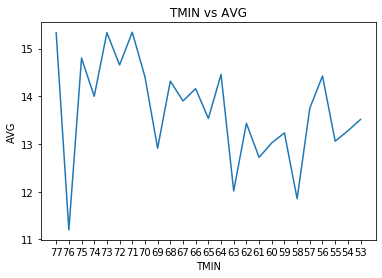

+--------+-----+
|Holidays|count|
+--------+-----+
|       0|28728|
|       1|  634|
+--------+-----+

Average Offenses on non-Holidays: 16.20304568527919
Average Offenses on Holidays: 12.68
+-----+------------------+
|SNOW2|               AVG|
+-----+------------------+
|    0|13.808206106870228|
|    1|               8.4|
+-----+------------------+



In [4]:
# Final analysis of data on additional features
from pandas.tseries.holiday import USFederalHolidayCalendar
import pandas as pd
from datetime import date
from pyspark.sql.types import IntegerType

# load data from csv
def load_data(filename):
    return spark.read.csv(filename, inferSchema=True, header=True)

def line_plot(df, x_col, y_col, color):
    df_pos = [i for i, _ in enumerate(df[x_col])]
    plt.plot(df_pos, df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(x_col+" vs "+y_col)
    plt.xticks(df_pos, df[x_col])
    plt.show()

# Total of Offenses over the years
def tmax_analysis(crime_df, weather_df):
    temp_max = crime_df.groupBy('TMAX').count().orderBy('count',ascending=False)
    temp_mx = weather_df.groupBy('TMAX').count().orderBy('TMAX',ascending=False)
    temp_max.createOrReplaceTempView("CR_TABLE")
    temp_mx.createOrReplaceTempView("WR_TABLE")
    res = spark.sql("SELECT C.TMAX, (C.COUNT/W.COUNT) AS AVG  FROM CR_TABLE C, WR_TABLE W\
                    WHERE C.TMAX = W.TMAX ORDER BY TMAX DESC")
    print("TMAX vs Offense count table")
    res.show(res.count())
    res2 = res.withColumn("TMAX", res["TMAX"].cast(IntegerType()))
    line_plot(res2.limit(25).toPandas(), "TMAX", "AVG", "RdYlGn")

def tmin_analysis(crime_df, weather_df):
    temp_min = crime_df.groupBy('TMIN').count().orderBy('count',ascending=False)
    temp_mn = weather_df.groupBy('TMIN').count().orderBy('TMIN',ascending=False)
    temp_min.createOrReplaceTempView("CR_TABLE")
    temp_mn.createOrReplaceTempView("WR_TABLE")
    res = spark.sql("SELECT C.TMIN, (C.COUNT/W.COUNT) AS AVG  FROM CR_TABLE C, WR_TABLE W\
                    WHERE C.TMIN = W.TMIN ORDER BY C.TMIN DESC")
    print("TMIN vs Offense count table")
    res.show(res.count())
    line_plot(res.limit(25).toPandas(), "TMIN", "AVG", "RdYlGn")

def holiday_analysis(crime_df, weather_df):
    temp_min = crime_df.groupBy('Holidays').count().orderBy('count',ascending=False)
    temp_min.show(5)
    min_date, max_date = crime_df.select(min("DateReported"), max("DateReported")).first()
    holidays_list = USFederalHolidayCalendar().holidays(start = min_date.date(), end = max_date.date()).tolist()
    hol_num = len(holidays_list)
    d0 = min_date.date()
    d1 = max_date.date()
    delta = d1 - d0
    non_hol_num = (delta.days-hol_num)
    print("Average Offenses on non-Holidays:", temp_min.head(2)[0][1]/non_hol_num)
    print("Average Offenses on Holidays:", temp_min.head(2)[1][1]/hol_num)

def snow_analysis(crime_df, weather_df):
    snow = crime_df.groupBy('SNOW').count().orderBy('count',ascending=True)
    sn = crime_df.withColumn('SNOW2', when(crime_df.SNOW > 0, 1).otherwise(0))
    sn2 = weather_df.withColumn('SNOW2', when(weather_df.SNOW > 0, 1).otherwise(0))
    snow_c = sn.groupBy('SNOW2').count().orderBy('count',ascending=False)
    snow_w = sn2.groupBy('SNOW2').count().orderBy('count',ascending=False)
    snow_c.createOrReplaceTempView("CR_TABLE")
    snow_w.createOrReplaceTempView("WR_TABLE")
    res = spark.sql("SELECT C.SNOW2, (C.COUNT/W.COUNT) AS AVG  FROM CR_TABLE C, WR_TABLE W WHERE C.SNOW2 = W.SNOW2 ORDER BY AVG DESC")
    res.show(res.count())

# load data
crime_df = load_data('Final_Crime_Data.csv')
print("Crime dataset")
crime_df.show(5)
weather_df = load_data('weather_cho.csv')
print("Weather dataset")
weather_df.show(5)

# tmax analysis
tmax_analysis(crime_df, weather_df)

# tmin analysis
tmin_analysis(crime_df, weather_df)

# Holidays analysis
holiday_analysis(crime_df, weather_df)

# snow analysis
snow_analysis(crime_df, weather_df)